In [93]:
import sys  
sys.path.insert(0, '../code')
import deep_forest
import torch as th
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [94]:
# 1000 x 2 ==> batch x features
x = th.rand([1000, 2])
x[:, 0] *= 2*pi
x[:, 0] -= pi
x[:, 1] *= 3
x[:, 1] -= 1.5

# Labels
y = (th.sin(x[:, 0] * 2) * 0.5 < x[:, 1]).long()

In [95]:
model = deep_forest.DeepForest(25, 2, 2, 1, 10)

In [105]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = model.to(device)
x = x.to(device)
y = y.to(device)

In [106]:
optimizer = th.optim.Adam(model.parameters())
for i in range(2000):
    model.populate_best(x[:, :], y[:])
    optimizer.zero_grad()

    loss = model.loss(x[:, :], y[:], device)
    loss.backward()
    optimizer.step()

    if i % 200 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((model.forward(x[:, :], device) == y[:]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((model.forward(x[:, :], device) == y[:]).float())))

====EPOCH 0====
Acc: tensor(0.9720)
Loss: tensor([96.0511], grad_fn=<AddBackward0>)
====EPOCH 200====
Acc: tensor(0.9770)
Loss: tensor([95.7106], grad_fn=<AddBackward0>)
====EPOCH 400====
Acc: tensor(0.9840)
Loss: tensor([95.8838], grad_fn=<AddBackward0>)
====EPOCH 600====
Acc: tensor(0.9850)
Loss: tensor([95.6795], grad_fn=<AddBackward0>)
====EPOCH 800====
Acc: tensor(0.9880)
Loss: tensor([96.0497], grad_fn=<AddBackward0>)
====EPOCH 1000====
Acc: tensor(0.9880)
Loss: tensor([95.9304], grad_fn=<AddBackward0>)
====EPOCH 1200====
Acc: tensor(0.9920)
Loss: tensor([96.3091], grad_fn=<AddBackward0>)
====EPOCH 1400====
Acc: tensor(0.9930)
Loss: tensor([96.7429], grad_fn=<AddBackward0>)
====EPOCH 1600====
Acc: tensor(0.9920)
Loss: tensor([97.1706], grad_fn=<AddBackward0>)
====EPOCH 1800====
Acc: tensor(0.9920)
Loss: tensor([97.5443], grad_fn=<AddBackward0>)
FINAL ACC: tensor(0.9920)


tensor([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])
tensor([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])


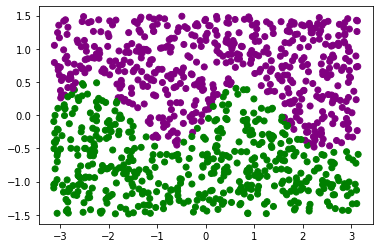

In [107]:
print(y[:15])
print(model.forward(x, device)[:15].long())
cdict = {0: 'green', 1: 'purple'}
plt.scatter(x[:, 0], x[:, 1], c=[cdict[i] for i in model.forward(x, device).cpu().numpy()])
plt.show()

In [104]:
mlp = nn.Sequential(
    nn.Linear(2, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 2),
    nn.Softmax()
)

optimizer = th.optim.Adam(mlp.parameters())
for i in range(1500):
    optimizer.zero_grad()

    preds = mlp(x[:, :])
    loss = nn.functional.cross_entropy(preds, (y[:].type(th.LongTensor)).to(device))
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((th.argmax(mlp(x[:]), 1) == y[:]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((th.argmax(mlp(x[:]), 1) == y[:]).float())))

====EPOCH 0====
Acc: tensor(0.5140)
Loss: tensor(0.6844, grad_fn=<NllLossBackward>)
====EPOCH 100====
Acc: tensor(0.8980)
Loss: tensor(0.4896, grad_fn=<NllLossBackward>)
====EPOCH 200====
Acc: tensor(0.9160)
Loss: tensor(0.4029, grad_fn=<NllLossBackward>)
====EPOCH 300====
Acc: tensor(0.9230)
Loss: tensor(0.3887, grad_fn=<NllLossBackward>)
====EPOCH 400====
Acc: tensor(0.9340)
Loss: tensor(0.3809, grad_fn=<NllLossBackward>)
====EPOCH 500====
Acc: tensor(0.9410)
Loss: tensor(0.3744, grad_fn=<NllLossBackward>)
====EPOCH 600====
Acc: tensor(0.9450)
Loss: tensor(0.3695, grad_fn=<NllLossBackward>)
====EPOCH 700====
Acc: tensor(0.9500)
Loss: tensor(0.3650, grad_fn=<NllLossBackward>)
====EPOCH 800====
Acc: tensor(0.9580)
Loss: tensor(0.3603, grad_fn=<NllLossBackward>)
====EPOCH 900====
Acc: tensor(0.9660)
Loss: tensor(0.3563, grad_fn=<NllLossBackward>)
====EPOCH 1000====
Acc: tensor(0.9670)
Loss: tensor(0.3534, grad_fn=<NllLossBackward>)
====EPOCH 1100====
Acc: tensor(0.9690)
Loss: tensor(0.3

In [101]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2)
clf.fit(x[:, :].numpy(), y[:].numpy())
print(clf.score(x[:, :].numpy(), y[:].numpy()))

0.923
